In [5]:
import pandas as pd
from sklearn.svm import SVC
import math
import matplotlib.pyplot as plt
from sklearn import svm

In [6]:
def load(path_test, path_train):
  # Load up the data.
  # You probably could have written this..
  with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
  with open(path_train, 'r') as f: training = pd.read_csv(f)

  # The number of samples between training and testing can vary
  # But the number of features better remain the same!
  n_features = testing.shape[1]

  X_test  = testing.ix[:,:n_features-1]
  X_train = training.ix[:,:n_features-1]
  y_test  = testing.ix[:,n_features-1:].values.ravel()
  y_train = training.ix[:,n_features-1:].values.ravel()

  #
  # Special:
  X_train = X_train[:int(len(X_train.index)*.04)]
  y_train = y_train[:int(math.ceil(y_train.shape[0]) * .04)]
  return X_train, X_test, y_train, y_test


def peekData(X_train):
  # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
  print ("Peeking your data...")
  fig = plt.figure()

  cnt = 0
  for col in range(5):
    for row in range(10):
      plt.subplot(5, 10, cnt + 1)
      plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.axis('off')
      cnt += 1
  fig.set_tight_layout(True)
  plt.show()


def drawPredictions(X_train, X_test, y_train, y_test):
  fig = plt.figure()

  # Make some guesses
  y_guess = model.predict(X_test)


  #
  # INFO: This is the second lab we're demonstrating how to
  # do multi-plots using matplot lab. In the next assignment(s),
  # it'll be your responsibility to use this and assignment #1
  # as tutorials to add in the plotting code yourself!
  num_rows = 10
  num_cols = 5

  index = 0
  for col in range(num_cols):
    for row in range(num_rows):
      plt.subplot(num_cols, num_rows, index + 1)

      # 8x8 is the size of the image, 64 pixels
      plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

      # Green = Guessed right
      # Red = Fail!
      fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
      plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
      plt.axis('off')
      index += 1
  fig.set_tight_layout(True)
  plt.show()

In [7]:
X_train, X_test, y_train, y_test = load('Datasets/optdigits.tes', 'Datasets/optdigits.tra')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [8]:
print ("Training SVC Classifier...")
#
model = SVC(kernel = 'linear', C=1, gamma = .001)
model.fit(X_train,y_train)
print ("Scoring SVC Classifier...")
score = model.score(X_test,y_test)
print ("Score:\n", score)

Training SVC Classifier...
Scoring SVC Classifier...
Score:
 0.854120267261


In [9]:
true_1000th_test_value = y_test[1001]
print ("1000th test label: ", true_1000th_test_value)

1000th test label:  0


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


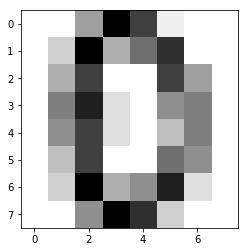

In [10]:
plt.imshow(X_test.iloc[1001,:].reshape(8,8), cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()